In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs, make_circles

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
x, y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [6]:
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
x_train, x_test, y_train_named, y_test_named, y_train, y_test = train_test_split(x, y_named, y, random_state=0)
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [24]:
(gbrt.decision_function(x_test)>0).astype(int)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [10]:
gbrt.predict(x_test)

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [27]:
gbrt.classes_[(gbrt.decision_function(x_test)>0).astype(int)]

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [32]:
gbrt.predict_proba(x_test)

array([[1.57362639e-02, 9.84263736e-01],
       [8.45756526e-01, 1.54243474e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74070327e-01, 2.59296728e-02],
       [1.35214212e-02, 9.86478579e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.99543275e-01, 4.56725221e-04],
       [1.61426376e-02, 9.83857362e-01],
       [2.48329911e-01, 7.51670089e-01],
       [3.20518935e-02, 9.67948107e-01],
       [9.98441637e-01, 1.55836338e-03],
       [1.35214212e-02, 9.86478579e-01],
       [1.98099245e-02, 9.80190075e-01],
       [7.68580365e-01, 2.31419635e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.84817480e-01, 1.51825198e-02],
       [7.73836215e-01, 2.26163785e-01],
       [9.80463909e-01, 1.95360915e-02],
       [1.73607896e-02, 9.82639210e-01],
       [1.61426376e-02, 9.83857362e-01],
       [1.61426376e-02, 9.83857362e-01],
       [3.41393574e-01, 6.58606426e-01],
       [6.30759509e-02, 9.36924049e-01],
       [9.34424749e-01, 6.55752512e-02],
       [8.661995

# k-Means Clustering

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

# generate synthetic two-dimensional data
x, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3).fit(x)

In [37]:
kmeans.predict(x) == kmeans.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

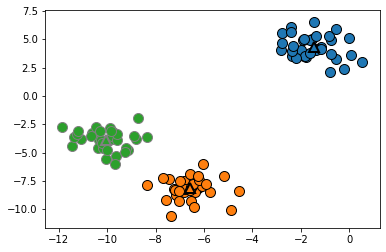

In [39]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2
)

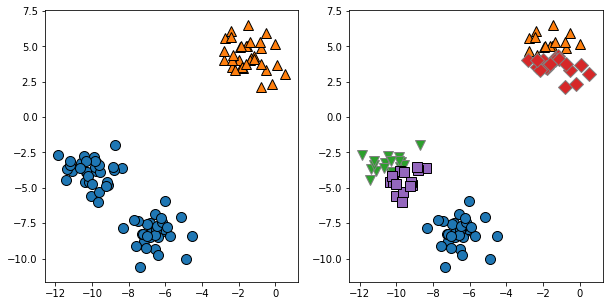

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
assignments = kmeans.labels_
mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
assignments = kmeans.labels_
mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes[1])

# Agglomerative Cluster

Text(0, 0.5, 'Feature 1')

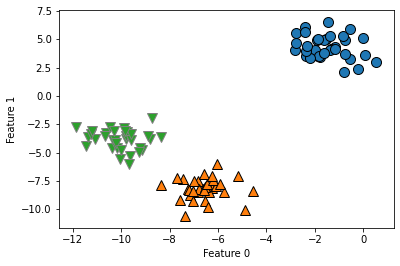

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
x, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x)

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

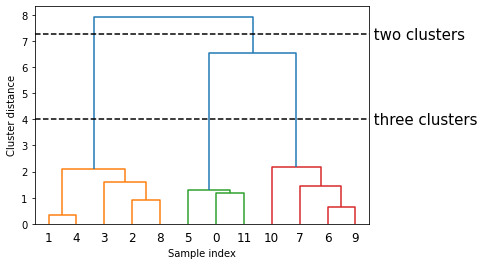

In [6]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

x, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(x)
# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
x, y = make_blobs(random_state=0, n_samples=12)
clusters = DBSCAN().fit_predict(x)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


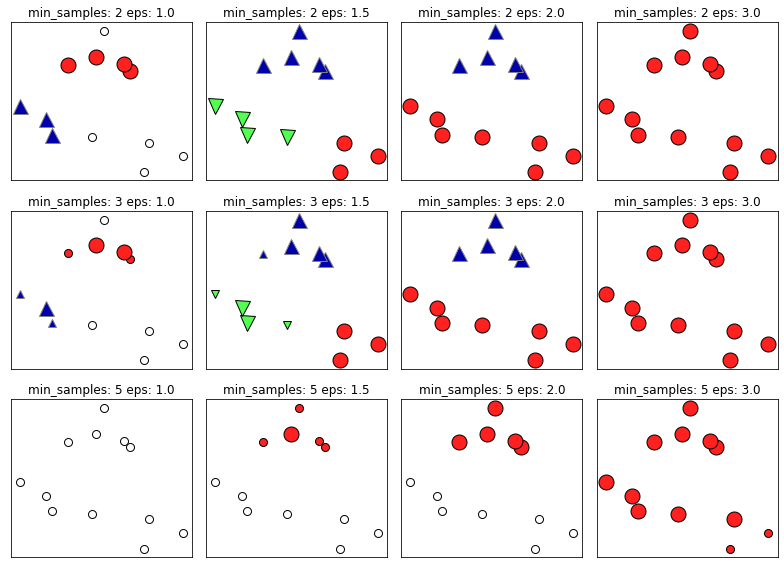

In [8]:
mglearn.plots.plot_dbscan()

# Test Scaling

In [4]:
x, y = make_blobs(random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

[-1.92558859 -2.20969956]
[1.92032607 1.80725785]
[-1.67292999 -1.30675655]
[1.94232453 2.2965006 ]


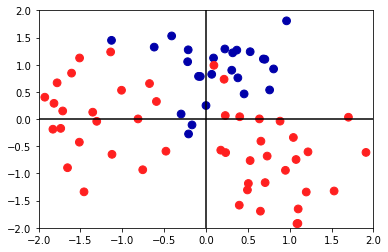

In [22]:
stdscaler = StandardScaler().fit(x_train)
x_train_stdscaled = stdscaler.transform(x_train)
x_test_stdscaled = stdscaler.transform(x_test)
print(x_train_stdscaled.min(axis=0))
print(x_train_stdscaled.max(axis=0))
print(x_test_stdscaled.min(axis=0))
print(x_test_stdscaled.max(axis=0))
plt.scatter(x_train_stdscaled[:, 0], x_train_stdscaled[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

[-1.51473633 -1.50281389]
[1.19325849 1.17669407]
[-1.33683374 -0.90050654]
[1.2087481  1.50304303]


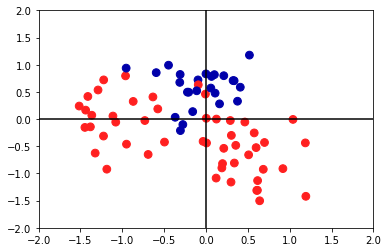

In [19]:
roscaler = RobustScaler().fit(x_train)
x_train_roscaled = roscaler.transform(x_train)
x_test_roscaled = roscaler.transform(x_test)
print(x_train_roscaled.min(axis=0))
print(x_train_roscaled.max(axis=0))
print(x_test_roscaled.min(axis=0))
print(x_test_roscaled.max(axis=0))
plt.scatter(x_train_roscaled[:, 0], x_train_roscaled[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

[0. 0.]
[1. 1.]
[0.06569532 0.22478282]
[1.00571996 1.12179436]


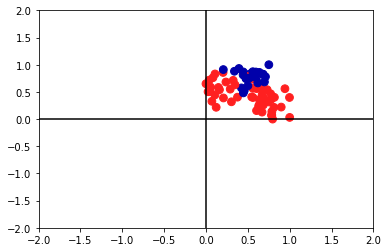

In [17]:
mmscaler = MinMaxScaler().fit(x_train)
x_train_mmscaled = mmscaler.transform(x_train)
x_test_mmscaled = mmscaler.transform(x_test)
print(x_train_mmscaled.min(axis=0))
print(x_train_mmscaled.max(axis=0))
print(x_test_mmscaled.min(axis=0))
print(x_test_mmscaled.max(axis=0))
plt.scatter(x_train_mmscaled[:, 0], x_train_mmscaled[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

[-0.95243536 -0.24555554]
[0.996838   0.99987465]
[-0.77314792  0.24010774]
[0.97074625 0.99455762]


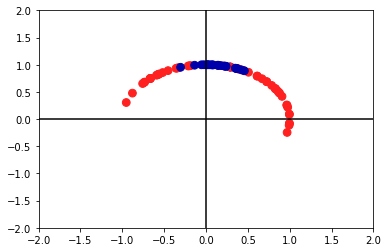

In [20]:
nscaler = Normalizer().fit(x_train)
x_train_nscaled = nscaler.transform(x_train)
x_test_nscaled = nscaler.transform(x_test)
print(x_train_nscaled.min(axis=0))
print(x_train_nscaled.max(axis=0))
print(x_test_nscaled.min(axis=0))
print(x_test_nscaled.max(axis=0))
plt.scatter(x_train_nscaled[:, 0], x_train_nscaled[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')